# Assement Task 2 - Data analysis project

Today, I'm working on beginning my project.  9/07/24
I looked through the weather API and tested it out. I did have to troubleshoot an issue but in the end it worked! I now have decided to move on and 

In [2]:
import openmeteo_requests
# Turn off WINDOWS REALTIME PROTECTION! Even with admin it didn't work but realtime protection on windows defneder for some reason stopped it from working. 
import requests_cache
import pandas as pd
from retry_requests import retry


# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)

retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)

openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://api.open-meteo.com/v1/forecast"
params = {
	"latitude": -33.4267,
	"longitude": 151.3417,
	"hourly": "temperature_2m"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m

hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe)

OperationalError: unable to open database file

Today, I'm working on beginning my project.  9/07/24
I looked through the API and tested it out.


I ended up trying to decide between NASA DATA https://api.nasa.gov/  and Cyroptcurrency data https://docs.coingecko.com/v3.0.1/reference/introduction#. In the end I decided to choose cryptocurrency as I found it more intreasting and I had questions which I wanted this data anaylisis project to answer.

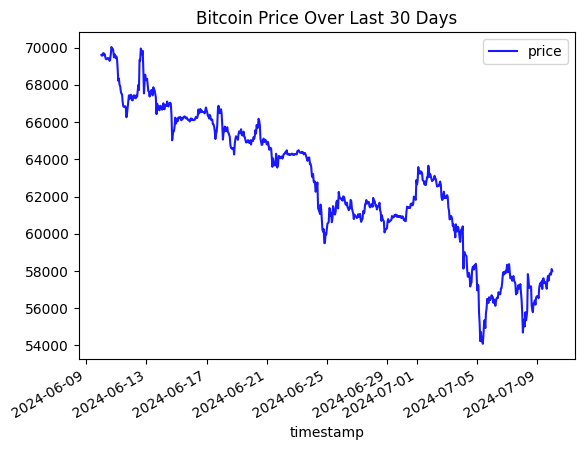

()

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Define the API endpoint and parameters
base_url = 'https://api.coingecko.com/api/v3/coins'
coin_id = input("Chose a Cryptocurrency out of the following- Bitcoin:").lower()
endpoint = f'{base_url}/{coin_id}/market_chart'
params = {
    'vs_currency': 'usd',
    'days': '30'
}

# Fetch data
response = requests.get(endpoint, params=params)
data = response.json()

# Extract price data
prices = data['prices']

# Convert to DataFrame
df = pd.DataFrame(prices, columns=['timestamp', 'price'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Plot data
df.plot(
    kind='line',
    x='timestamp',
    y='price',
    color='blue',
    alpha=0.9,
    title='Bitcoin Price Over Last 30 Days'
)

plt.show()
()

I next begin to devlop the GUI
I again had issues with Windows real time protection messing with python so I made a bypass to tell it to ignore python 3.11.5 

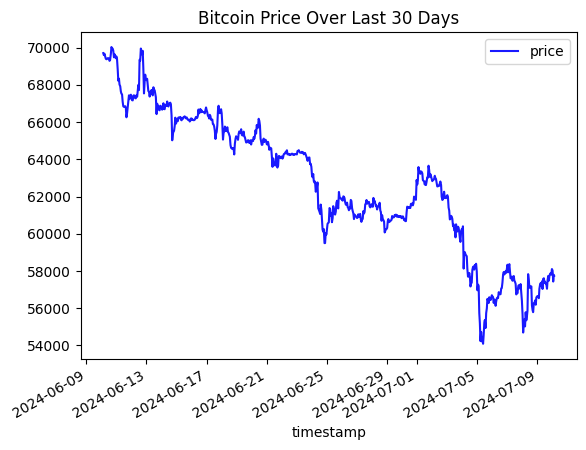

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

c:\Users\Riley\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from flask import Flask, render_template, request
app = Flask(__name__)
base_url = 'https://api.coingecko.com/api/v3/coins'
coin_id = input("Chose a Cryptocurrency out of the following- Bitcoin :").lower()
endpoint = f'{base_url}/{coin_id}/market_chart'
params = {
    'vs_currency': 'usd',
    'days': '30'
}
"""def get_coins():
    url = 'https://api.coingecko.com/api/v3/coins/markets'
    params = {
        'vs_currency': 'usd',
        'order': 'market_cap_desc',
        'per_page': 20,
        'page': 1,
        'sparkline': False
    }
    response = requests.get(url, params=params)
    if response.status_code != 200:
        return None
    return response.json()
"""    
# Fetch data
response = requests.get(endpoint, params=params)
data = response.json()

# Extract price data
prices = data['prices']

# Convert to DataFrame
df = pd.DataFrame(prices, columns=['timestamp', 'price'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Plot data
df.plot(
    kind='line',
    x='timestamp',
    y='price',
    color='blue',
    alpha=0.9,
    title='Bitcoin Price Over Last 30 Days'
)

plt.show()
()
if __name__ == '__main__':
    app.run(debug=True)